In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('../datasets/cath-4.2/chain_set_map_with_b_factors.pkl', 'rb') as f:
    data_pdb = pickle.load(f)

In [3]:
import json

file_path = '../datasets/cath-4.2/chain_set_splits.json'

with open(file_path, 'r') as file:
    data = json.load(file)



# validation

In [ ]:
val_prots = data['validation']

In [23]:
b_factor_less_than_50 = 0
missingCoordCount = 0
for prot in val_prots:
    curr_prot = data_pdb[prot]

    if 'X' in curr_prot['seq']:
        print(prot)

    if any(np.isnan(coord).any() for coord in curr_prot['coords']['N']):
        missingCoordCount += 1
        continue
    avg_b_factor = float(np.mean(curr_prot['b_factors']))
    max_b_factor = float(np.max(curr_prot['b_factors']))
    if max_b_factor < 50:
        b_factor_less_than_50 += 1

print(f"Number of proteins with missing coordinates: {missingCoordCount}")
print(f"Number of proteins with B-factor < 50: {b_factor_less_than_50}")

Number of proteins with missing coordinates: 423
Number of proteins with B-factor < 50: 130


In [5]:
prot_bFacAgnostic = {}
missingCoordCount = 0
for prot in val_prots:
    curr_prot = data_pdb[prot]

    if 'X' in curr_prot['seq']:
        print(prot)

    if any(np.isnan(coord).any() for coord in curr_prot['coords']['N']):
        missingCoordCount += 1
        continue
    avg_b_factor = float(np.mean(curr_prot['b_factors']))
    prot_bFacAgnostic[prot] = {
        'length': len(curr_prot['seq']),
        'avg_b_factor': avg_b_factor,
        'max_b_factor': float(np.max(curr_prot['b_factors']))
    }
prot_bFacAgnostic = pd.DataFrame.from_dict(prot_bFacAgnostic, orient='index')
prot_bFacAgnostic['Protein_ID'] = prot_bFacAgnostic.index
print(f"Number of proteins with missing coordinates: {missingCoordCount}")

Number of proteins with missing coordinates: 423


In [6]:
prot_bFacAgnostic[prot_bFacAgnostic['Protein_ID'] == '1wkr.A'].to_csv('../datasets/1wkr.A.csv')

In [7]:
prot_info = {}
for prot in val_prots:
    curr_prot = data_pdb[prot]
    if 'X' in curr_prot['seq'] or any(np.isnan(coord).any() for coord in curr_prot['coords']['N']):
        continue
    avg_b_factor = float(np.mean(curr_prot['b_factors']))
    if avg_b_factor < 3:
        continue
    prot_info[prot] = {
        'length': len(curr_prot['seq']),
        'avg_b_factor': avg_b_factor,
        'max_b_factor': float(np.max(curr_prot['b_factors']))
    }
prot_info = pd.DataFrame.from_dict(prot_info, orient='index')
prot_info['Protein_ID'] = prot_info.index

In [8]:
prot_info

,length,avg_b_factor,max_b_factor,Protein_ID
1h2s.A,225,25.040899,57.000000,1h2s.A
1cel.A,434,17.071648,52.369999,1cel.A
1c52.A,131,12.732387,38.474998,1c52.A
3o2u.A,190,27.111536,56.577499,3o2u.A
2c6u.A,122,8.297564,23.135000,2c6u.A
...,...,...,...,...
1b96.A,244,27.973759,53.404999,1b96.A
1exk.A,79,10.000000,10.000000,1exk.A
1h31.A,261,17.116493,27.607500,1h31.A
3bdw.A,123,41.157684,48.564999,3bdw.A


In [13]:
checked_prot = '1wkr.A'
checked_prot in prot_info['Protein_ID'].values

True

In [9]:
df_esm_performance = pd.read_csv('../datasets/pdb_esmfold_comparison.csv')
df_esm_performance = df_esm_performance[df_esm_performance['pred_structure_length'] == df_esm_performance['ref_structure_length']]
df_esm_performance = df_esm_performance.rename(columns={'structure_name': 'Protein_ID'})

In [10]:
df_esm_performance.to_csv('../datasets/proteins_with_no_missing_residues_bFacAgnostic_156.csv', index=False)

In [11]:
df_esm_performance[df_esm_performance['Protein_ID'] == '1m70.A']

,Protein_ID,sequence_length,predicted_sequence,true_sequence,sequence_accuracy,pred_structure_length,ref_structure_length,tm_score,tm_score_ref,rmsd,aligned_length,seq_id_aligned,predicted_structure_path,reference_structure_path
23,1m70.A,NaN,NaN,NaN,NaN,190,190,0.978331,0.978331,0.876256,190,0.994737,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1m70_chainA.pdb


In [14]:
# add the minimum of 'tm_score' and 'tm_score_ref' from df_esm_performance based on 'structure_name' column in prot_info
prot_bFacAgnostic = prot_bFacAgnostic.merge(df_esm_performance[['Protein_ID', 'tm_score', 'tm_score_ref']], left_on='Protein_ID', right_on='Protein_ID', how='left')
prot_bFacAgnostic['min_tm_score'] = prot_bFacAgnostic[['tm_score', 'tm_score_ref']].min(axis=1)

In [16]:
prot_bFacAgnostic

,length,avg_b_factor,max_b_factor,Protein_ID,tm_score,tm_score_ref,min_tm_score
0,64,0.000000,0.000000,2e6i.A,0.384186,0.384186,0.384186
1,70,0.000000,0.000000,2mh3.A,0.643835,0.643835,0.643835
2,146,0.000000,0.000000,1z8s.A,0.560276,0.560276,0.560276
3,46,0.000000,0.000000,1f7e.A,0.726253,0.726253,0.726253
4,129,0.000000,0.000000,2lg7.A,0.638903,0.638903,0.638903
...,...,...,...,...,...,...,...
180,123,41.157684,48.564999,3bdw.A,0.960582,0.960582,0.960582
181,50,0.000000,0.000000,1iox.A,0.405963,0.405963,0.405963
182,417,81.504387,188.262497,2cfq.A,0.900548,0.900548,0.900548
183,78,0.000000,0.000000,1gks.A,0.913265,0.913265,0.913265


In [38]:
threshold = 0.95
max_b = 74
df_tm_filtered = prot_bFacAgnostic[(prot_bFacAgnostic['min_tm_score'] > threshold) & (prot_bFacAgnostic['max_b_factor'] < max_b)]
print(len(df_tm_filtered))
df_tm_filtered.to_csv('../datasets/proteins_with_no_missing_residues_bFacUnder75_tmAbove95_count30.csv', index=False)

30


In [38]:
# add the minimum of 'tm_score' and 'tm_score_ref' from df_esm_performance based on 'structure_name' column in prot_info
prot_info = prot_info.merge(df_esm_performance[['structure_name', 'tm_score', 'tm_score_ref']], left_on='Protein_ID', right_on='structure_name', how='left')
prot_info['min_tm_score'] = prot_info[['tm_score', 'tm_score_ref']].min(axis=1)

In [21]:
prot_info

,length,avg_b_factor,max_b_factor,Protein_ID,structure_name,tm_score,tm_score_ref,min_tm_score
0,225,25.040899,57.000000,1h2s.A,1h2s.A,0.971548,0.971548,0.971548
1,434,17.071648,52.369999,1cel.A,1cel.A,0.870749,0.872638,0.870749
2,131,12.732387,38.474998,1c52.A,1c52.A,0.984525,0.984525,0.984525
3,190,27.111536,56.577499,3o2u.A,3o2u.A,0.859722,0.850937,0.850937
4,122,8.297564,23.135000,2c6u.A,2c6u.A,0.972166,0.934858,0.934858
...,...,...,...,...,...,...,...,...
105,244,27.973759,53.404999,1b96.A,1b96.A,0.917925,0.917925,0.917925
106,79,10.000000,10.000000,1exk.A,1exk.A,0.668640,0.668640,0.668640
107,261,17.116493,27.607500,1h31.A,1h31.A,0.885389,0.888733,0.885389
108,123,41.157684,48.564999,3bdw.A,3bdw.A,0.960582,0.960582,0.960582


In [25]:
prot_info = prot_info.sort_values(by='min_tm_score', ascending=False)
prot_info

,length,avg_b_factor,max_b_factor,Protein_ID,structure_name,tm_score,tm_score_ref,min_tm_score
93,247,14.569909,25.982500,1nmp.A,1nmp.A,0.992645,0.992645,0.992645
67,334,16.990463,50.810001,1j71.A,1j71.A,0.992319,0.992319,0.992319
78,340,6.352522,16.100000,1wkr.A,1wkr.A,0.992197,0.992197,0.992197
45,325,20.085686,44.970001,1uh9.A,1uh9.A,0.987803,0.987803,0.987803
36,128,21.659979,42.192501,1dv8.A,1dv8.A,0.987123,0.987123,0.987123
...,...,...,...,...,...,...,...,...
72,68,36.848198,65.617500,2lfh.A,2lfh.A,0.537379,0.537379,0.537379
14,118,18.765444,45.095001,1dx5.I,1dx5.I,0.498545,0.498545,0.498545
89,148,15.588199,80.632500,3zfn.A,3zfn.A,0.409754,0.384337,0.384337
25,71,37.945637,55.792500,2kl7.A,2kl7.A,0.286786,0.286786,0.286786


In [27]:
# check the pearson and spearman correlatio between min_tm_score and max_b_factor
import scipy.stats as stats

pearson_corr = stats.pearsonr(prot_info['min_tm_score'], prot_info['max_b_factor'])
spearman_corr = stats.spearmanr(prot_info['min_tm_score'], prot_info['max_b_factor'])

print(f"Pearson correlation: {pearson_corr[0]}, p-value: {pearson_corr[1]}")
print(f"Spearman correlation: {spearman_corr[0]}, p-value: {spearman_corr[1]}")

pearson_corr = stats.pearsonr(prot_info['min_tm_score'], prot_info['avg_b_factor'])
spearman_corr = stats.spearmanr(prot_info['min_tm_score'], prot_info['avg_b_factor'])

print(f"Pearson correlation: {pearson_corr[0]}, p-value: {pearson_corr[1]}")
print(f"Spearman correlation: {spearman_corr[0]}, p-value: {spearman_corr[1]}")

Pearson correlation: -0.1317307890581619, p-value: 0.17012335344447313
Spearman correlation: -0.15488617741440386, p-value: 0.10616592755377237
Pearson correlation: -0.14816437223533288, p-value: 0.12240708507730405
Spearman correlation: -0.18492929903186767, p-value: 0.053098960387755495


In [8]:
# sort prot info in a descending order
prot_info = prot_info.sort_values(by='max_b_factor', ascending=True)

In [4]:
prot_info

NameError: name 'prot_info' is not defined

In [ ]:
prot_info.to_csv('../datasets/proteins_with_no_missing_residues.csv', index=False)

In [ ]:
prot_info_short = prot_info[prot_info['length']<250]

In [4]:
prot_info_short[:50]

NameError: name 'prot_info_short' is not defined

In [15]:
usable_20 = list(prot_info_short[:20].index)

In [16]:
usable_25 = list(prot_info_short[:25].index)
usable_50 = list(prot_info_short[:50].index)
usable_83 = list(prot_info_short[:83].index)

In [17]:
# save usable to a npy file
np.save('../datasets/usable_val_proteins_under_250_for_struct_eval_top25.npy', usable_25)
np.save('../datasets/usable_val_proteins_under_250_for_struct_eval_top50.npy', usable_50)
np.save('../datasets/usable_val_proteins_under_250_for_struct_eval_top83.npy', usable_83)

In [76]:
len(usable)

20

In [22]:
prot_info_short.loc['3alu.A']

length          157.000000
avg_b_factor     16.952532
max_b_factor     43.882500
Name: 3alu.A, dtype: float64

In [5]:
df_filt

NameError: name 'df_filt' is not defined

In [20]:
max_bfac = 48
max_len = 500
df_filt = prot_info[(prot_info['max_b_factor']<max_bfac) & (prot_info['length']<max_len)]
df_filt, len(df_filt)
df_filt['Protein_ID'] = df_filt.index
df_filt.reset_index(drop=True, inplace=True)
df_filt.to_csv('../datasets/usable_val_proteins_under_500_for_struct_eval_maxBFac48.csv', index=False)


/tmp/ipykernel_3028772/3906812778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['Protein_ID'] = df_filt.index


In [19]:
df_filt

,length,avg_b_factor,max_b_factor,Protein_ID
0,79,10.000000,10.000000,1exk.A
1,57,10.000000,10.000000,2lev.A
2,83,10.201235,13.467500,1cc5.A
3,340,6.352522,16.100000,1wkr.A
4,71,8.784735,18.637501,1c75.A
5,300,7.523067,19.395000,1qgj.A
6,81,13.108487,19.582500,2blf.B
7,261,10.400402,20.177500,1h32.A
8,124,12.648583,21.530001,1gu2.A
9,122,8.297564,23.135000,2c6u.A


In [3]:
import numpy as np
np.load("../datasets/usable_val_proteins_under_250_for_struct_eval_top20.npy")

array(['1exk.A', '2lev.A', '1cc5.A', '1c75.A', '2blf.B', '1gu2.A',
       '2c6u.A', '2vuv.A', '3m3g.A', '1nmp.A', '3lur.A', '2kqp.A',
       '3x2h.A', '2yhf.A', '1ql3.A', '4kmg.A', '1nmo.A', '1sbx.A',
       '3rs1.A', '1tgr.A'], dtype='<U6')

# test

In [4]:
test_prots = data['test']

In [5]:
df_esmfold_test = pd.read_csv("../datasets/pdb_esmfold_comparison_testset.csv")
df_esmfold_test = df_esmfold_test.rename(columns={"structure_name": "Protein_ID"})
df_esmfold_test

,Protein_ID,sequence_length,predicted_sequence,true_sequence,sequence_accuracy,pred_structure_length,ref_structure_length,tm_score,tm_score_ref,rmsd,aligned_length,seq_id_aligned,predicted_structure_path,reference_structure_path
0,5e3x.A,NaN,NaN,NaN,NaN,489,489,0.995554,0.995554,0.527327,489,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/5e3x_chainA.pdb
1,1gwy.A,NaN,NaN,NaN,NaN,175,175,0.993997,0.993997,0.387942,175,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1gwy_chainA.pdb
2,1bed.A,NaN,NaN,NaN,NaN,181,181,0.993186,0.993186,0.419064,181,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1bed_chainA.pdb
3,3t8i.A,NaN,NaN,NaN,NaN,306,312,0.992315,0.973352,0.590044,312,0.980769,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/3t8i_chainA.pdb
4,2qwo.B,NaN,NaN,NaN,NaN,92,92,0.992029,0.992029,0.314353,92,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/2qwo_chainB.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1o22.A,NaN,NaN,NaN,NaN,170,146,0.261473,0.291374,4.512138,247,0.210526,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1o22_chainA.pdb
1116,3hw5.B,NaN,NaN,NaN,NaN,261,180,0.253637,0.353024,4.249621,358,0.170391,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/3hw5_chainB.pdb
1117,1avv.A,NaN,NaN,NaN,NaN,151,99,0.239189,0.317135,5.018185,189,0.185185,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1avv_chainA.pdb
1118,1xq8.A,NaN,NaN,NaN,NaN,140,140,0.209129,0.209129,3.893167,237,0.135021,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1xq8_chainA.pdb


In [6]:
df_esmfold_test_nomissing = df_esmfold_test[df_esmfold_test['pred_structure_length'] == df_esmfold_test['ref_structure_length']]
df_esmfold_test_nomissing

,Protein_ID,sequence_length,predicted_sequence,true_sequence,sequence_accuracy,pred_structure_length,ref_structure_length,tm_score,tm_score_ref,rmsd,aligned_length,seq_id_aligned,predicted_structure_path,reference_structure_path
0,5e3x.A,NaN,NaN,NaN,NaN,489,489,0.995554,0.995554,0.527327,489,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/5e3x_chainA.pdb
1,1gwy.A,NaN,NaN,NaN,NaN,175,175,0.993997,0.993997,0.387942,175,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1gwy_chainA.pdb
2,1bed.A,NaN,NaN,NaN,NaN,181,181,0.993186,0.993186,0.419064,181,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1bed_chainA.pdb
4,2qwo.B,NaN,NaN,NaN,NaN,92,92,0.992029,0.992029,0.314353,92,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/2qwo_chainB.pdb
5,1gt7.A,NaN,NaN,NaN,NaN,274,274,0.990885,0.990885,0.592772,274,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1gt7_chainA.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,2lt5.A,NaN,NaN,NaN,NaN,120,120,0.299423,0.299423,5.177163,172,0.250000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/2lt5_chainA.pdb
1106,2jov.A,NaN,NaN,NaN,NaN,85,85,0.297434,0.297434,3.964270,123,0.300813,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/2jov_chainA.pdb
1107,5tvo.B,NaN,NaN,NaN,NaN,59,59,0.292942,0.292942,4.379083,78,0.371795,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/5tvo_chainB.pdb
1111,3on9.A,NaN,NaN,NaN,NaN,163,163,0.280039,0.280039,4.738110,254,0.188976,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/3on9_chainA.pdb


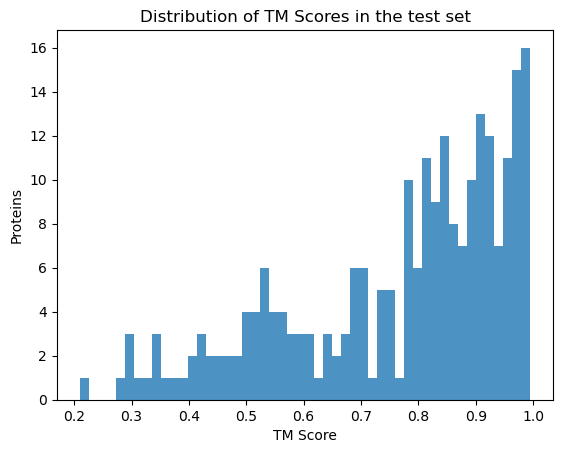

In [7]:
plt.hist(df_esmfold_test_nomissing['tm_score'], bins=50, alpha=0.8)
plt.xlabel("TM Score")
plt.ylabel("Proteins")
plt.title("Distribution of TM Scores in the test set")
plt.show()

In [8]:
prot_bFacAgnostic_test = {}
missingCoordCount = 0
for prot in test_prots:
    curr_prot = data_pdb[prot]

    if 'X' in curr_prot['seq']:
        print(prot)

    if any(np.isnan(coord).any() for coord in curr_prot['coords']['N']):
        missingCoordCount += 1
        continue
    avg_b_factor = float(np.mean(curr_prot['b_factors']))
    prot_bFacAgnostic_test[prot] = {
        'length': len(curr_prot['seq']),
        'avg_b_factor': avg_b_factor,
        'max_b_factor': float(np.max(curr_prot['b_factors']))
    }
prot_bFacAgnostic_test = pd.DataFrame.from_dict(prot_bFacAgnostic_test, orient='index')
prot_bFacAgnostic_test['Protein_ID'] = prot_bFacAgnostic_test.index
print(f"Number of proteins with missing coordinates: {missingCoordCount}")

Number of proteins with missing coordinates: 832


In [9]:
prot_bFacAgnostic_test

,length,avg_b_factor,max_b_factor,Protein_ID
2d9e.A,121,0.000000,0.000000,2d9e.A
2lkl.A,81,0.000000,0.000000,2lkl.A
1ifw.A,92,0.000000,0.000000,1ifw.A
1buq.A,125,0.000000,0.000000,1buq.A
2lp7.A,59,0.000000,0.000000,2lp7.A
...,...,...,...,...
2owp.A,129,45.358654,71.157501,2owp.A
2l5l.A,136,0.000000,0.000000,2l5l.A
2lrt.A,152,0.000000,0.000000,2lrt.A
4abm.A,79,20.350508,48.845001,4abm.A


In [10]:
df_esmfold_test_nomissing

,Protein_ID,sequence_length,predicted_sequence,true_sequence,sequence_accuracy,pred_structure_length,ref_structure_length,tm_score,tm_score_ref,rmsd,aligned_length,seq_id_aligned,predicted_structure_path,reference_structure_path
0,5e3x.A,NaN,NaN,NaN,NaN,489,489,0.995554,0.995554,0.527327,489,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/5e3x_chainA.pdb
1,1gwy.A,NaN,NaN,NaN,NaN,175,175,0.993997,0.993997,0.387942,175,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1gwy_chainA.pdb
2,1bed.A,NaN,NaN,NaN,NaN,181,181,0.993186,0.993186,0.419064,181,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1bed_chainA.pdb
4,2qwo.B,NaN,NaN,NaN,NaN,92,92,0.992029,0.992029,0.314353,92,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/2qwo_chainB.pdb
5,1gt7.A,NaN,NaN,NaN,NaN,274,274,0.990885,0.990885,0.592772,274,1.000000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/1gt7_chainA.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,2lt5.A,NaN,NaN,NaN,NaN,120,120,0.299423,0.299423,5.177163,172,0.250000,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/2lt5_chainA.pdb
1106,2jov.A,NaN,NaN,NaN,NaN,85,85,0.297434,0.297434,3.964270,123,0.300813,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/2jov_chainA.pdb
1107,5tvo.B,NaN,NaN,NaN,NaN,59,59,0.292942,0.292942,4.379083,78,0.371795,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/5tvo_chainB.pdb
1111,3on9.A,NaN,NaN,NaN,NaN,163,163,0.280039,0.280039,4.738110,254,0.188976,datasets/esmfold_predictions/esmfold_predictio...,datasets/all_chain_pdbs/3on9_chainA.pdb


In [11]:
# add the minimum of 'tm_score' and 'tm_score_ref' from df_esm_performance based on 'structure_name' column in prot_info
prot_bFacAgnostic_test = prot_bFacAgnostic_test.merge(df_esmfold_test_nomissing[['Protein_ID', 'tm_score', 'tm_score_ref']], left_on='Protein_ID', right_on='Protein_ID', how='left')
prot_bFacAgnostic_test['min_tm_score'] = prot_bFacAgnostic_test[['tm_score', 'tm_score_ref']].min(axis=1)

In [12]:
prot_bFacAgnostic_test

,length,avg_b_factor,max_b_factor,Protein_ID,tm_score,tm_score_ref,min_tm_score
0,121,0.000000,0.000000,2d9e.A,0.909478,0.909478,0.909478
1,81,0.000000,0.000000,2lkl.A,0.318674,0.318674,0.318674
2,92,0.000000,0.000000,1ifw.A,0.530752,0.530752,0.530752
3,125,0.000000,0.000000,1buq.A,0.871428,0.871428,0.871428
4,59,0.000000,0.000000,2lp7.A,0.424355,0.424355,0.424355
...,...,...,...,...,...,...,...
283,129,45.358654,71.157501,2owp.A,NaN,NaN,NaN
284,136,0.000000,0.000000,2l5l.A,0.838161,0.838161,0.838161
285,152,0.000000,0.000000,2lrt.A,0.835972,0.835972,0.835972
286,79,20.350508,48.845001,4abm.A,NaN,NaN,NaN


In [13]:
prot_bFacAgnostic_test = prot_bFacAgnostic_test[~prot_bFacAgnostic_test['min_tm_score'].isna()]

In [14]:
tm_threshold = 0.95
avg_b_factor_threshold = 40
max_b_factor_threshold = 100
prot_bFacAgnostic_test_filtered = prot_bFacAgnostic_test[(prot_bFacAgnostic_test['min_tm_score'] >= tm_threshold) & (prot_bFacAgnostic_test['avg_b_factor'] < avg_b_factor_threshold) & (prot_bFacAgnostic_test['max_b_factor'] < max_b_factor_threshold)]
len(prot_bFacAgnostic_test_filtered)

36

In [17]:
prot_bFacAgnostic_test_filtered[['Protein_ID', 'avg_b_factor', 'max_b_factor', 'tm_score', 'length']].reset_index()

,index,Protein_ID,avg_b_factor,max_b_factor,tm_score,length
0,19,1gh2.A,23.163551,47.272499,0.984725,107
1,20,4m6r.A,28.799555,71.142502,0.965751,224
2,21,3h5k.A,19.096083,53.627499,0.986816,261
3,33,1aaz.A,24.598248,53.032501,0.970628,87
4,36,1mpy.A,13.684170,32.237499,0.954944,307
5,37,1a8l.A,25.274580,65.769997,0.989065,226
6,51,5e3x.A,24.796762,72.040001,0.995554,489
7,66,3ffv.A,22.535221,64.245003,0.979482,181
8,71,2qwo.B,26.735977,43.599998,0.992029,92
9,78,3vfi.A,21.954639,44.907501,0.988450,104


In [16]:
prot_bFacAgnostic_test_filtered.to_csv('../datasets/proteins_testset36_eval_tm95.csv', index=False)

# train

In [4]:
train_prots = data['train']

In [5]:
prot_bFacAgnostic_train = {}
missingCoordCount = 0
has_x = 0
for prot in train_prots:
    curr_prot = data_pdb[prot]

    if any(np.isnan(coord).any() for coord in curr_prot['coords']['N']) or 'X' in curr_prot['seq']:
        missingCoordCount += 1
        continue
    avg_b_factor = float(np.mean(curr_prot['b_factors']))
    prot_bFacAgnostic_train[prot] = {
        'length': len(curr_prot['seq']),
        'avg_b_factor': avg_b_factor,
        'max_b_factor': float(np.max(curr_prot['b_factors']))
    }
prot_bFacAgnostic_train = pd.DataFrame.from_dict(prot_bFacAgnostic_train, orient='index')
prot_bFacAgnostic_train['Protein_ID'] = prot_bFacAgnostic_train.index
print(f"Number of proteins with missing coordinates: {missingCoordCount}")

Number of proteins with missing coordinates: 13844
